In [29]:
import nltk
nltk.download('stopwords') #liste pré-définie de stopwords
from nltk.corpus import stopwords #attention de bien nettoyer les stopwords !! sinon résultats bizarres

import os
import yake #(Yet Another Keyword Extractor) "that uses text statistical features to select the most important keywords from a document"

from collections import Counter
from wordcloud import WordCloud #besoin de compilateur c++ pour l'installer

from IPython.display import Image

import re #pour les expressions régulières afin de nettoyer l OCRisation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\casia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#jouer encore avec cela pour en ajouter des nouveaux en fonction du contexte, modifié de la liste de https://github.com/stopwords-iso/stopwords-fr?tab=readme-ov-file, à verifer sa fidelité
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", "elles",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", ":", "même", "voir", "fois", "jour", "année", "ans", "faites", "le", "la", "de"]

# New stopwords to add
git_stopwords = [
    "a", "abord", "absolument", "afin", "ah", "ai", "aie", "aient", "aies", "ailleurs", "ainsi", "ait", "allaient", "allo", "allons", "allô", "alors", "anterieur", "anterieure", "anterieures", "apres", "après", "as", "assez", "attendu", "au", "aucun", "aucune", "aucuns", "aujourd", "aujourd'hui", "aupres", "auquel", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autant", "autre", "autrefois", "autrement", "autres", "autrui", "aux", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez", "aviez", "avions", "avoir", "avons", "ayant", "ayez", "ayons", "bah", "bas", "basee", "bat", "beau", "beaucoup", "bien", "bigre", "bon", "boum", "bravo", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cependant", "certain", "certaine", "certaines", "certains", "certes", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "chacun", "chacune", "chaque", "cher", "chers", "chez", "chiche", "chut", "chère", "chères", "ci", "cinq", "cinquantaine", "cinquante", "cinquantième", "cinquième", "clac", "clic", "combien", "comme", "comment", "comparable", "comparables", "compris", "concernant", "contre", "couic", "crac", "dans", "de", "debout", "dedans", "dehors", "deja", "delà", "depuis", "dernier", "derniere", "derriere", "derrière", "des", "desormais", "desquelles", "desquels", "dessous", "dessus", "deux", "deuxième", "deuxièmement", "devant", "devers", "devra", "devrait", "different", "differentes", "differents", "différent", "différente", "différentes", "différents", "dire", "directe", "directement", "dit", "dite", "dits", "divers", "diverse", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dixième", "doit", "doivent", "donc", "dont", "dos", "douze", "douzième", "dring", "droite", "du", "duquel", "durant", "dès", "début", "désormais", "effet", "egale", "egalement", "egales", "eh", "elle", "elle-même", "elles", "elles-mêmes", "en", "encore", "enfin", "entre", "envers", "environ", "es", "essai", "est", "et", "etant", "etc", "etre", "eu", "eue", "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "eux-mêmes", "exactement", "excepté", "extenso", "exterieur", "eûmes", "eût", "eûtes", "f", "fais", "faisaient", "faisant", "fait", "faites", "façon", "feront", "fi", "flac", "floc", "fois", "font", "force", "furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "fûmes", "fût", "fûtes", "gens", "haut", "hein", "hem", "hep", "holà", "hop", "hormis", "hors", "hou", "houp", "hue", "hui", "huit", "huitième", "hum", "hurrah", "hé", "hélas", "i", "ici", "il", "ils", "importe", "j", "je", "jusqu", "jusque", "juste", "la", "laisser", "laquelle", "las", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "longtemps", "lors", "lorsque", "lui", "lui-meme", "lui-même", "là", "lès", "ma", "maint", "maintenant", "mais", "malgre", "malgré", "maximale", "me", "meme", "memes", "merci", "mes", "mien", "mienne", "miennes", "miens", "mille", "mince", "mine", "minimale", "moi", "moi-meme", "moi-même", "moindres", "moins", "mon", "mot", "moyennant", "multiple", "multiples", "même", "mêmes", "na", "n'a" "naturel", "naturelle", "naturelles", "ne", "neanmoins", "necessaire", "necessairement", "neuf", "neuvième", "ni", "nombreuses", "nombreux", "nommés", "non", "nos", "notamment", "notre", "nous", "nous-mêmes", "nouveau", "nouveaux", "nul", "néanmoins", "nôtre", "nôtres", "oh", "ohé", "ollé", "olé", "on", "ont", "onze", "onzième", "ore", "ou", "ouf", "ouias", "oust", "ouste", "outre", "ouvert", "ouverte", "ouverts", "où", "paf", "par", "parce", "parfois", "parle", "parlent", "parler", "parmi", "parole", "parseme", "partant", "particulier", "particulière", "particulièrement", "pas", "passé", "pendant", "pense", "permet", "personne", "personnes", "peu", "peut", "peuvent", "peux", "pff", "pfft", "pfut", "pif", "pire", "pièce", "plein", "plouf", "plupart", "plus", "plusieurs", "plutôt", "possessif", "possessifs", "possible", "possibles", "pouah", "pour", "pourquoi", "pourrais", "pourrait", "pouvait", "prealable", "precisement", "premier", "première", "premièrement", "pres", "probable", "probante", "procedant", "proche", "près", "psitt", "pu", "puis", "puisque", "pur", "pure", "qu", "quand", "quant", "quant-à-soi", "quanta", "quarante", "quatorze", "quatre", "quatre-vingt", "quatrième", "quatrièmement", "que", "quel", "quelconque", "quelle", "quelles", "quelqu'un", "quelque", "quelques", "quels", "qui", "quiconque", "quinze", "quoi", "quoique", "r", "rare", "rarement", "rares", "relative", "relativement", "remarquable", "rend", "rendre", "restant", "reste", "restent", "restrictif", "retour", "revoici", "revoilà", "rien", "sa", "sacrebleu", "sait", "sans", "sapristi", "sauf", "se", "sein", "seize", "selon", "semblable", "semblaient", "semble", "semblent", "sent", "sept", "septième", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "seul", "seule", "seulement", "si", "sien", "sienne", "siennes", "siens", "sinon", "six", "sixième", "soi", "soi-même", "soient", "sois", "soit", "soixante", "sommes", "son", "sont", "sous", "souvent", "soyez", "soyons", "specifique", "specifiques", "speculatif", "stop", "strictement", "subtiles", "suffisant", "suffisante", "suffit", "suis", "suit", "suivant", "suivante", "suivantes", "suivants", "suivre", "sujet", "superpose", "sur", "surtout", "ta", "tac", "tandis", "tant", "tardive", "te", "tel", "telle", "tellement", "telles", "tels", "tenant", "tend", "tenir", "tente", "tes", "tic", "tien", "tienne", "tiennes", "tiens", "toc", "toi", "toi-même", "ton", "touchant", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "tres", "trois", "troisième", "troisièmement", "trop", "très", "tsoin", "tsouin", "tu", "té", "un", "une", "unes", "uniformement", "unique", "uniques", "uns", "va", "vais", "valeur", "vas", "vers", "via", "vif", "vifs", "vingt", "vivat", "vive", "vives", "vlan", "voici", "voie", "voient", "voilà", "voire", "vont", "vos", "votre", "vous", "vous-mêmes", "vu", "vé", "vôtre", "vôtres", "zut", "à", "â", "ça", "ès", "étaient", "étais", "était", "étant", "état", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "ô"
]

#domaine specific 
specific_stopwords = [
"rue", "-", "drapeau", "DRAPEAU", "LE", "ROUGE", "com", "qu'il", "d'une", "d'un", "l'on", "qu'il", "qu'ils", "qu'elle", "qu'elles", "qu", "il", "elle", "c", "est", "elles", "ils", "vient", "lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche", "soir", "ment", "janvier", "février", "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", "décembre", "déjà"
#garder les noms des villes pour faire une analyse spatiale? 
#does it also include common first names?
#does it also include uppercase versions?
#à voir : soir, matin = seront pe liés au nom du journal et non du temps de la journée, define what a stopword means in this context
]

#stop words supplémentaires de nltk
stops = set(stopwords.words('french'))

sw += git_stopwords
sw += specific_stopwords
sw += stops
sw = set(sw)


print(f"{len(sw)} stopwords:\n {sorted(sw)}")

723 stopwords:
 ['-', ':', 'DRAPEAU', 'LE', 'ROUGE', 'a', 'abord', 'absolument', 'afin', 'ah', 'ai', 'aie', 'aient', 'aies', 'ailleurs', 'ainsi', 'ait', 'allaient', 'allo', 'allons', 'allô', 'alors', 'année', 'ans', 'anterieur', 'anterieure', 'anterieures', 'août', 'apres', 'après', 'as', 'assez', 'attendu', 'au', 'aucun', 'aucune', 'aucuns', 'aujourd', "aujourd'hui", 'aupres', 'auquel', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autant', 'autre', 'autrefois', 'autrement', 'autres', 'autrui', 'aux', 'auxquelles', 'auxquels', 'avaient', 'avais', 'avait', 'avant', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'avril', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bah', 'bas', 'basee', 'bat', 'beau', 'beaucoup', 'bien', 'bigre', 'bon', 'boum', 'bravo', 'c', 'car', 'ce', 'ceci', 'cela', 'celle', 'celle-ci', 'celle-là', 'celles', 'celles-ci', 'celles-là', 'celui', 'celui-ci', 'celui-là', 'celà', 'c

In [15]:
#Tokenize each file individually then save each token in a dictionary
#I think it's best to first see all of they keywords per file before aggregating and then doing one big word cloud for the whole set, or just a certain period. I would've wanted to compare the wordcloud of the different periods ngl. I mean, at least I could do that for la libre belgique or whatever it was that was also reporting in 1835

data_path = "../../data/halley/halley_txt/"
tokenised_files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

tokens_by_file = {}

for filename in tokenised_files:
    filepath = os.path.join(data_path, filename)
    
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read() # Récupérer le texte du fichier individualement 

    
    # Tokenize
    tokens = nltk.wordpunct_tokenize(text) # Extraire les tokens du texte en cours
    
    # Filtrer les tokens =>  garder les mots de plus de 2 lettres, alphabétiques et pas dans les stopwords, les autres sont des mots parasites
    filtered_tokens = [w.lower() for w in tokens 
                      if len(w) > 2 # Ne garder que les mots de plus de 2 lettres
                      if w.isalpha() 
                      and w.lower() not in sw #filterer pour les stopwords et les lowercase
                      and not re.search(r'(.)\1{2,}', w.lower())] #filtrer les lettres qui se repetent avec un regex
    
    tokens_by_file[filename] = filtered_tokens

print(len(tokenised_files))


551


In [16]:
# Combine ALL filtered tokens from all files into one list
all_tokens = []
for tokens in tokens_by_file.values():
    all_tokens.extend(tokens)

# Now calculate frequency across all files
fdist = nltk.FreqDist(all_tokens)
fdist.most_common(50)

print(f"Total tokens across all files: {len(all_tokens)}")
print(f"Unique words: {len(fdist)}")

Total tokens across all files: 1557735
Unique words: 217939


In [17]:
#récupérer la fréquence des mots sur toute le dataset 
fdist = nltk.FreqDist(all_tokens) #why do I get the impression this is only working for part of the files
fdist.most_common(50)

#voisins plus proches to halley would be useful
#or maybe we do a co-text analysis of words around halley?

[('heures', 4175),
 ('bruxelles', 3618),
 ('grand', 3095),
 ('prix', 2688),
 ('temps', 2602),
 ('lieu', 2568),
 ('comète', 2556),
 ('francs', 2549),
 ('mois', 2363),
 ('grande', 2281),
 ('pays', 2235),
 ('paris', 2222),
 ('matin', 2082),
 ('belgique', 2075),
 ('jours', 2044),
 ('ministre', 1970),
 ('saint', 1967),
 ('cours', 1893),
 ('gouvernement', 1890),
 ('ville', 1844),
 ('point', 1816),
 ('maison', 1740),
 ('président', 1733),
 ('belge', 1709),
 ('chambre', 1708),
 ('général', 1704),
 ('place', 1684),
 ('terre', 1670),
 ('roi', 1664),
 ('part', 1615),
 ('france', 1560),
 ('midi', 1536),
 ('heure', 1516),
 ('moment', 1515),
 ('travail', 1466),
 ('homme', 1459),
 ('conseil', 1446),
 ('partie', 1430),
 ('question', 1428),
 ('liège', 1421),
 ('vie', 1411),
 ('société', 1407),
 ('loi', 1400),
 ('nouvelle', 1388),
 ('monde', 1382),
 ('exposition', 1374),
 ('ordre', 1362),
 ('soleil', 1341),
 ('nombre', 1320),
 ('hier', 1286)]

In [11]:
kw_extractor = yake.KeywordExtractor(
    lan="fr", 
    top=50,
    stopwords=sw, 
    n=1  # Extract up to bigrams (unigrams + bigrams)
)

all_token_keywords = {}

for filename in sorted(tokens_by_file.keys()):
    # 1. Get pre-filtered tokens for this file
    filtered_tokens = tokens_by_file[filename]
    
    # 2. Convert token list back to text
    text_from_tokens = ' '.join(filtered_tokens)
    
    # 3. Extract keywords using YAKE
    token_keywords = kw_extractor.extract_keywords(text_from_tokens)
    
    # 4. Store in dictionary
    all_token_keywords[filename] = token_keywords

Top 200 keywords: ['grand', 'heures', 'bruxelles', 'temps', 'lieu', 'francs', 'grande', 'paris', 'pays', 'prix', 'matin', 'comète', 'saint', 'belgique', 'gouvernement', 'ministre', 'chambre', 'cours', 'ville', 'président', 'point', 'belge', 'terre', 'général', 'roi', 'midi', 'place', 'conseil', 'maison', 'question', 'france', 'travail', 'homme', 'exposition', 'part', 'société', 'moment', 'hier', 'mme', 'loi', 'soleil', 'jeune', 'femme', 'vie', 'liège', 'mort', 'monde', 'heure', 'nouvelle', 'nord', 'partie', 'français', 'eau', 'fer', 'service', 'guerre', 'londres', 'millions', 'enfants', 'nombre', 'ordre', 'anvers', 'lune', 'etat', 'petit', 'comité', 'membres', 'jamais', 'parti', 'ouvriers', 'politique', 'hommes', 'nuit', 'projet', 'chef', 'suite', 'travaux', 'porte', 'théâtre', 'mètres', 'nom', 'journal', 'fille', 'droit', 'police', 'cour', 'commission', 'situation', 'monsieur', 'fin', 'concours', 'jean', 'voix', 'fit', 'congo', 'petite', 'ligne', 'prince', 'musique', 'meuse', 'directe

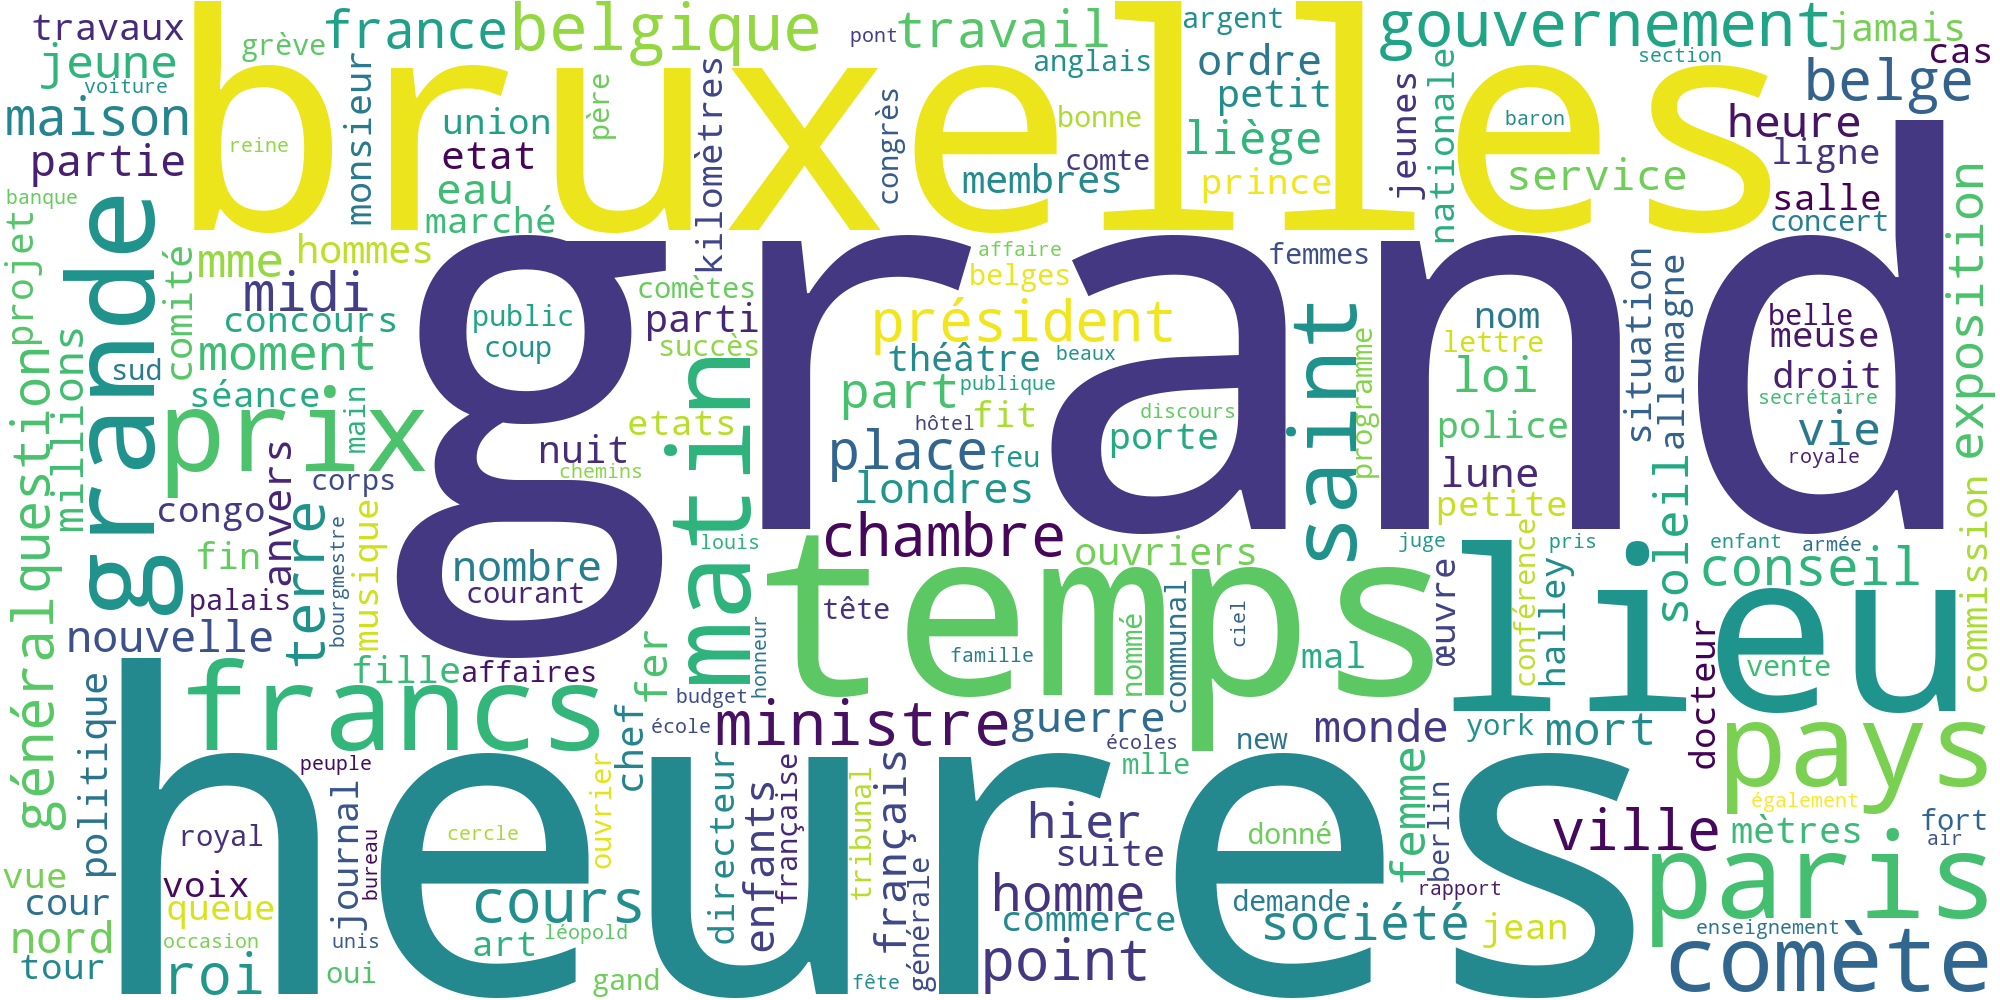

In [ ]:
# Word cloud of top 200 KEYWORDS from all files

# Flatten all keywords
all_keywords_flat = [kw for kws in all_token_keywords.values() for kw, score in kws]

# Count frequencies
keyword_freq = Counter(all_keywords_flat)
top_200 = dict(keyword_freq.most_common(200))

print(f"Top 200 keywords: {list(top_200.keys())}")

# Create and save word cloud
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)

cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(top_200)
cloud.to_file(os.path.join(temp_path, "halley_keywords_top200.png"))
Image(filename=os.path.join(temp_path, "halley_keywords_top200.png"))



In [ ]:
# Print sorted KEYWORDS by frequency (highest first)
print("Top 200 keywords sorted by frequency:")
for i, (keyword, frequency) in enumerate(sorted(top_200.items(), key=lambda x: x[1], reverse=True), 1):
    print(f"{i}. {keyword}: {frequency}")

Top 200 keywords sorted by frequency:
1. grand: 325
2. heures: 316
3. bruxelles: 299
4. temps: 254
5. lieu: 233
6. francs: 202
7. grande: 201
8. paris: 199
9. pays: 193
10. prix: 180
11. matin: 179
12. comète: 173
13. saint: 172
14. belgique: 172
15. gouvernement: 168
16. ministre: 159
17. chambre: 142
18. cours: 142
19. ville: 134
20. président: 134
21. point: 133
22. belge: 131
23. terre: 126
24. général: 126
25. roi: 124
26. midi: 117
27. place: 116
28. conseil: 113
29. maison: 110
30. question: 110
31. france: 109
32. travail: 106
33. homme: 106
34. exposition: 102
35. part: 101
36. société: 101
37. moment: 99
38. hier: 96
39. mme: 96
40. loi: 95
41. soleil: 93
42. jeune: 91
43. femme: 90
44. vie: 89
45. liège: 87
46. mort: 86
47. monde: 83
48. heure: 83
49. nouvelle: 81
50. nord: 81
51. partie: 80
52. français: 78
53. eau: 77
54. fer: 76
55. service: 76
56. guerre: 76
57. londres: 76
58. millions: 75
59. enfants: 73
60. nombre: 72
61. ordre: 72
62. anvers: 70
63. lune: 70
64. etat

#### Compute exact 'halley' counts from the tokenized and raw word lists 

Halley count in filtered tokens: 914
Halley count in raw words (normalized): 901
Saved wordcloud to ../../data/tmp\halley_from_all_tokens.png


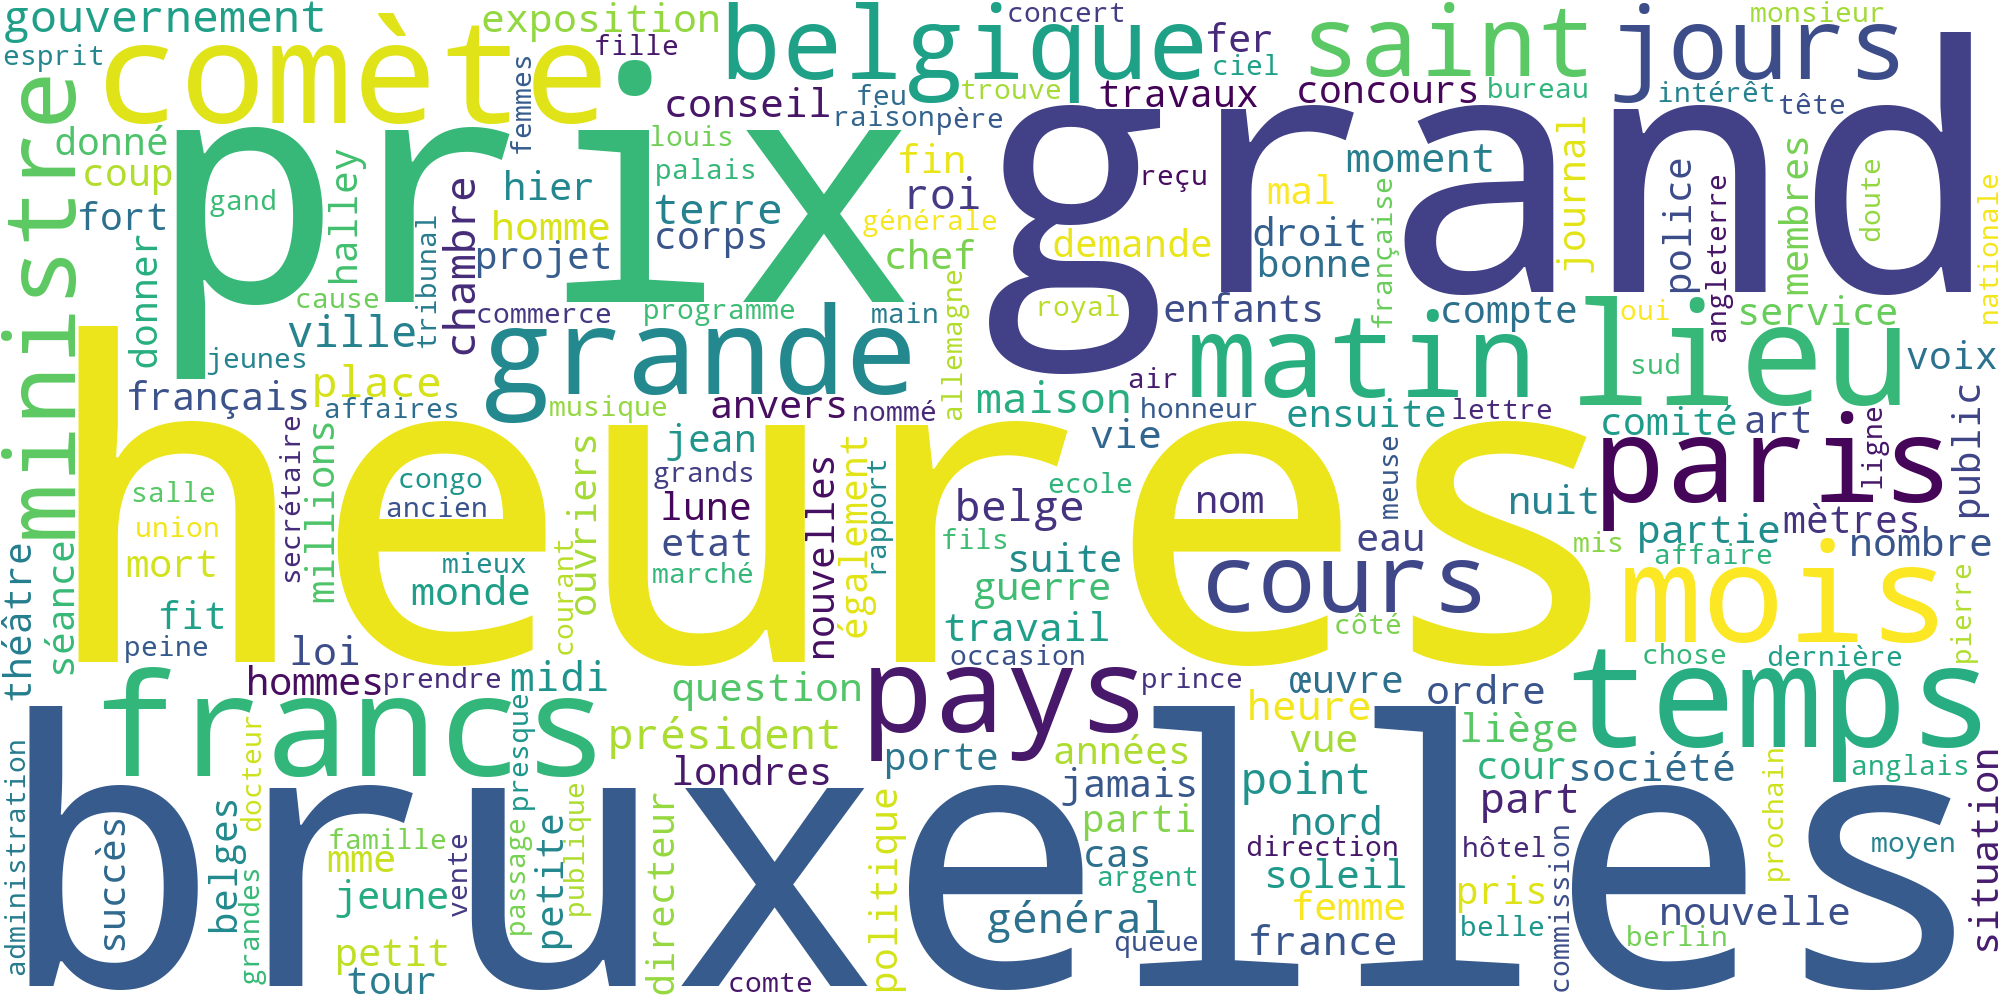

In [ ]:
# 1) Use the filtered token list `all_tokens` (tokens were lowercased when created)
halley_count = sum(1 for w in all_tokens if w.lower() == 'halley')
print(f"Halley count in filtered tokens: {halley_count}")

# 2) Also compute from the raw-read words (`all_words`) with simple normalization
import re
def _norm(w):
    return re.sub(r"[^a-zàâäéèêëîïôöùûüç']", "", w.lower())
halley_count_raw = sum(1 for w in all_words if _norm(w) == 'halley')
print(f"Halley count in raw words (normalized): {halley_count_raw}")

# 3) Regenerate a wordcloud from the full `all_tokens` frequency (absolute counts)
from collections import Counter
freq = Counter(all_tokens)
top = dict(freq.most_common(200))
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(top)
out_path = os.path.join(temp_path, "halley_from_all_tokens.png")
cloud.to_file(out_path)
print(f"Saved wordcloud to {out_path}")
Image(filename=out_path)

In [ ]:
# Print sorted WORDS (all tokens) by frequency (highest first)
print("Top 200 words sorted by frequency:")
for i, (word, frequency) in enumerate(sorted(top.items(), key=lambda x: x[1], reverse=True), 1):
    print(f"{i}. {word}: {frequency}")


Top 200 words sorted by frequency:
1. heures: 4175
2. bruxelles: 3618
3. grand: 3095
4. prix: 2688
5. temps: 2602
6. lieu: 2568
7. comète: 2556
8. francs: 2549
9. mois: 2363
10. grande: 2281
11. pays: 2235
12. paris: 2222
13. matin: 2082
14. belgique: 2075
15. jours: 2044
16. ministre: 1970
17. saint: 1967
18. cours: 1893
19. gouvernement: 1890
20. ville: 1844
21. point: 1816
22. maison: 1740
23. président: 1733
24. belge: 1709
25. chambre: 1708
26. général: 1704
27. place: 1684
28. terre: 1670
29. roi: 1664
30. part: 1615
31. france: 1560
32. midi: 1536
33. heure: 1516
34. moment: 1515
35. travail: 1466
36. homme: 1459
37. conseil: 1446
38. partie: 1430
39. question: 1428
40. liège: 1421
41. vie: 1411
42. société: 1407
43. loi: 1400
44. nouvelle: 1388
45. monde: 1382
46. exposition: 1374
47. ordre: 1362
48. soleil: 1341
49. nombre: 1320
50. hier: 1286
51. suite: 1271
52. mort: 1270
53. femme: 1253
54. service: 1247
55. nord: 1235
56. jeune: 1233
57. eau: 1232
58. anvers: 1230
59. fran

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45437 sha256=c5af2a0014082e8ef8f81cf93dbe8ac0dc7b0276d02f2c6332e180440132796e
  Stored in directory: c:\users\casia\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local\pip\cache\wheels\c4\16\4a\93374cd955bbe0553a8ce74db7f0fbd5fcc876e19fb78bd601
Successfully built matplotlib-venn
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


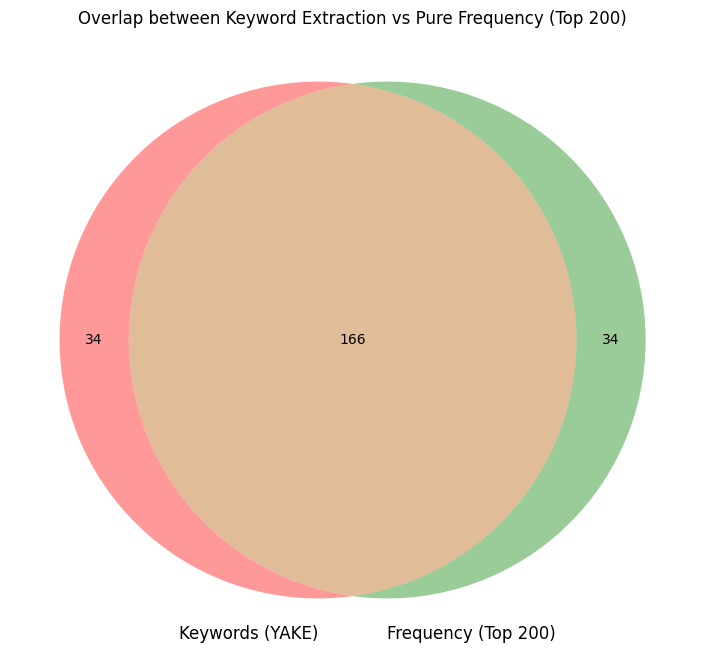

In [27]:
# Install missing package (Jupyter magic)
%pip install matplotlib-venn

import matplotlib.pyplot as plt
from matplotlib_venn import venn2

keywords_set = set(top_200.keys())
tokens_set = set(top.keys())

plt.figure(figsize=(10, 8))
venn2([keywords_set, tokens_set], 
      set_labels=('Keywords (YAKE)', 'Frequency (Top 200)'))
plt.title('Overlap between Keyword Extraction vs Pure Frequency (Top 200)')
plt.show()

Correlation between keyword scores and token frequencies: 0.968


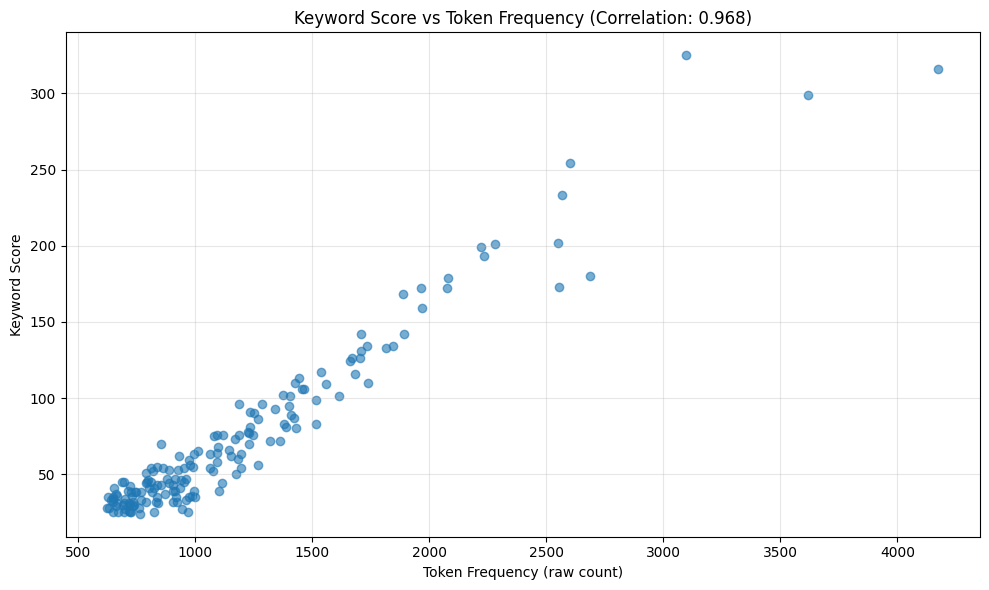

In [ ]:
# Calculate correlation between keyword scores and token frequencies for overlapping words
overlap = set(top_200.keys()) & set(top.keys())

kw_scores = [top_200[word] for word in overlap]
token_freqs = [top[word] for word in overlap]

# Pearson correlation
import numpy as np
correlation = np.corrcoef(kw_scores, token_freqs)[0, 1]
print(f"Correlation between keyword scores and token frequencies: {correlation:.3f}")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(token_freqs, kw_scores, alpha=0.6)
plt.xlabel('Token Frequency (raw count)')
plt.ylabel('Keyword Score')
plt.title(f'Keyword Score vs Token Frequency (Correlation: {correlation:.3f})')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
#Is YAKE just fancy word counting, or does it find semantic meaning? Whether there's a linear relationship between raw frequency and YAKE's scoring
# => seems to correlate moderately with raw frequency => High correlation = YAKE scores are driven by frequency VS Low correlation = YAKE is finding importance beyond just counting

In [ ]:
# Compare rankings, POSITIVE DIFFERENCE
#Interesting to see which words YAKE thinks are important vs which are just frequent = limites de la méthode statistique
#NOTE positive correlation means that as one increases, so does the other. Here, a positive correlation indicates that words with higher keyword scores also tend to have higher frequencies.
#NOTE positive correlation does not imply causation. While there is a relationship between keyword scores and token frequencies, it does not mean that one causes the other.
#NOTE correlation does not capture non-linear relationships. If the relationship between keyword scores and token frequencies is non-linear, the Pearson correlation coefficient may not fully capture it.


keywords_ranked = {word: i+1 for i, word in enumerate(top_200.keys())}
tokens_ranked = {word: i+1 for i, word in enumerate(top.keys())}

overlap = set(top_200.keys()) & set(top.keys())

# Calculate rank differences
rank_diff = []
for word in overlap:
    kw_rank = keywords_ranked[word]
    token_rank = tokens_ranked[word]
    rank_diff.append((word, kw_rank, token_rank, abs(kw_rank - token_rank)))

# Sort by biggest rank difference
rank_diff.sort(key=lambda x: x[3], reverse=True)

print("Words with biggest rank differences (keyword rank vs frequency rank):")
print(f"{'Word':<20} {'KW Rank':<10} {'Freq Rank':<10} {'Difference':<10}")
print("-" * 50)
for word, kw_rank, token_rank, diff in rank_diff[:200]:
    print(f"{word:<20} {kw_rank:<10} {token_rank:<10} {diff:<10}")

Words with biggest rank differences (keyword rank vs frequency rank):
Word                 KW Rank    Freq Rank  Difference
--------------------------------------------------
également            184        89         95        
pris                 174        94         80        
docteur              112        188        76        
prince               98         172        74        
meuse                100        170        70        
tribunal             133        199        66        
occasion             187        124        63        
air                  199        141        58        
comte                135        192        57        
berlin               125        182        57        
nommé                140        194        54        
lune                 63         117        54        
femmes               128        180        52        
argent               137        189        52        
demande              132        81         51        
donné          

In [39]:
# Compare rankings
keywords_ranked = {word: i+1 for i, word in enumerate(top_200.keys())}
tokens_ranked = {word: i+1 for i, word in enumerate(top.keys())}

overlap = set(top_200.keys()) & set(top.keys())

# Calculate rank differences (WITH SIGN)
rank_diff = []
for word in overlap:
    kw_rank = keywords_ranked[word]
    token_rank = tokens_ranked[word]
    diff = kw_rank - token_rank  # SIGNED difference (no abs())
    rank_diff.append((word, kw_rank, token_rank, diff))

# Sort by signed difference
rank_diff.sort(key=lambda x: x[3])

print("\nWords ranked MUCH HIGHER by YAKE (negative difference = better KW rank):")
print(f"{'Word':<20} {'KW Rank':<10} {'Freq Rank':<10} {'Difference':<10}")
print("-" * 60)
for word, kw_rank, token_rank, diff in rank_diff[:50]:  # Most negative, YAKE thinks this word is more important than its frequency suggests
    print(f"{word:<20} {kw_rank:<10} {token_rank:<10} {diff:<10}")

print("\n" + "="*60)
print("\nWords ranked MUCH HIGHER by FREQUENCY (positive difference = worse KW rank):")
print(f"{'Word':<20} {'KW Rank':<10} {'Freq Rank':<10} {'Difference':<10}")
print("-" * 60)
for word, kw_rank, token_rank, diff in rank_diff[-50:]:  # Most positive, Word is very frequent but YAKE doesn't think it's that important
    print(f"{word:<20} {kw_rank:<10} {token_rank:<10} {diff:<10}")


Words ranked MUCH HIGHER by YAKE (negative difference = better KW rank):
Word                 KW Rank    Freq Rank  Difference
------------------------------------------------------------
docteur              112        188        -76       
prince               98         172        -74       
meuse                100        170        -70       
tribunal             133        199        -66       
comte                135        192        -57       
berlin               125        182        -57       
nommé                140        194        -54       
lune                 63         117        -54       
femmes               128        180        -52       
argent               137        189        -52       
queue                107        156        -49       
monsieur             89         136        -47       
fille                83         130        -47       
nationale            118        162        -44       
gand                 147        190        -43       
c

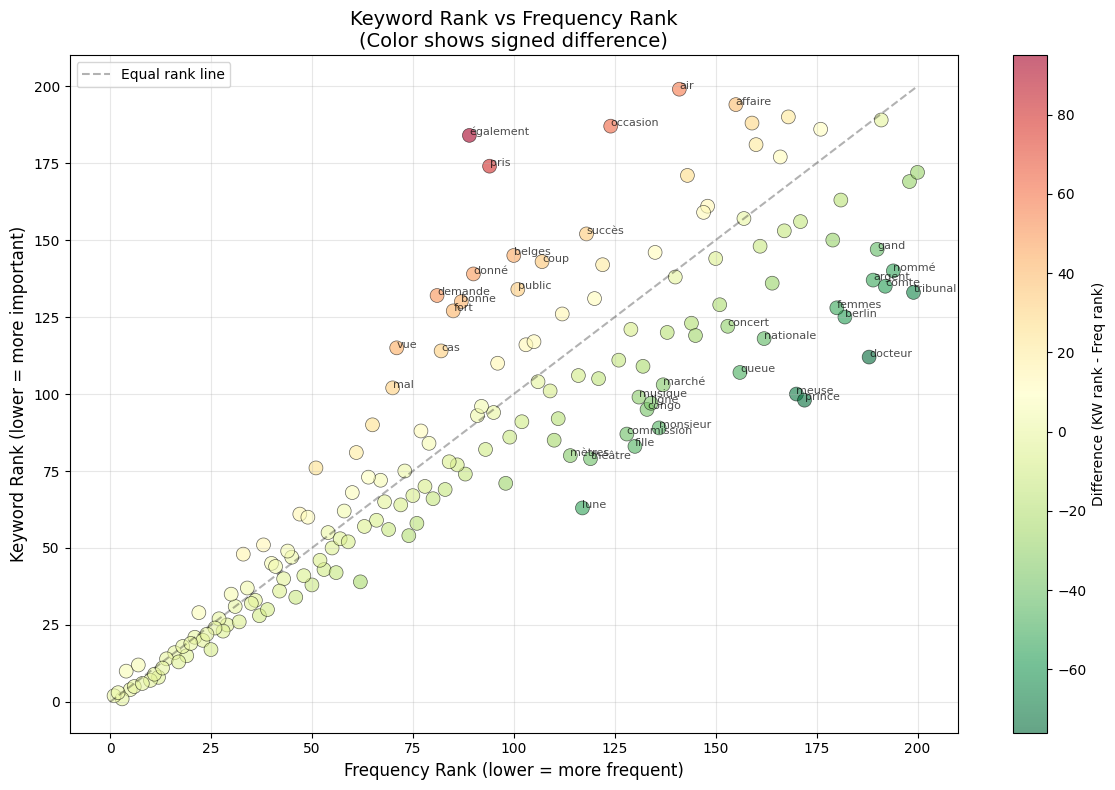


Color interpretation:
🟢 GREEN (negative diff): YAKE ranked it higher than frequency suggests (semantic importance)
🟡 YELLOW (near zero): YAKE and frequency agree
🔴 RED (positive diff): Frequency ranked it higher than YAKE (common but not distinctive)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get rankings
keywords_ranked = {word: i+1 for i, word in enumerate(top_200.keys())}
tokens_ranked = {word: i+1 for i, word in enumerate(top.keys())}
overlap = set(top_200.keys()) & set(top.keys())

# Prepare data
words_list = []
kw_ranks = []
freq_ranks = []
differences = []

for word in overlap:
    kw_rank = keywords_ranked[word]
    token_rank = tokens_ranked[word]
    diff = kw_rank - token_rank
    
    words_list.append(word)
    kw_ranks.append(kw_rank)
    freq_ranks.append(token_rank)
    differences.append(diff)

# Create scatter plot with color gradient
plt.figure(figsize=(12, 8))
scatter = plt.scatter(freq_ranks, kw_ranks, c=differences, 
                     cmap='RdYlGn_r',  # Red = positive, Green = negative
                     s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

# Add diagonal line (where ranks would be equal)
max_rank = max(max(kw_ranks), max(freq_ranks))
plt.plot([0, max_rank], [0, max_rank], 'k--', alpha=0.3, label='Equal rank line')

plt.xlabel('Frequency Rank (lower = more frequent)', fontsize=12)
plt.ylabel('Keyword Rank (lower = more important)', fontsize=12)
plt.title('Keyword Rank vs Frequency Rank\n(Color shows signed difference)', fontsize=14)
plt.colorbar(scatter, label='Difference (KW rank - Freq rank)')
plt.legend()
plt.grid(True, alpha=0.3)

# Annotate extreme outliers
for i, word in enumerate(words_list):
    if abs(differences[i]) > 30:  # Annotate words with big differences
        plt.annotate(word, (freq_ranks[i], kw_ranks[i]), 
                    fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()

# Interpretation guide
print("\nColor interpretation:")
print("🟢 GREEN (negative diff): YAKE ranked it higher than frequency suggests (semantic importance)")
print("🟡 YELLOW (near zero): YAKE and frequency agree")
print("🔴 RED (positive diff): Frequency ranked it higher than YAKE (common but not distinctive)")
#Which words does YAKE think are important despite low frequency?

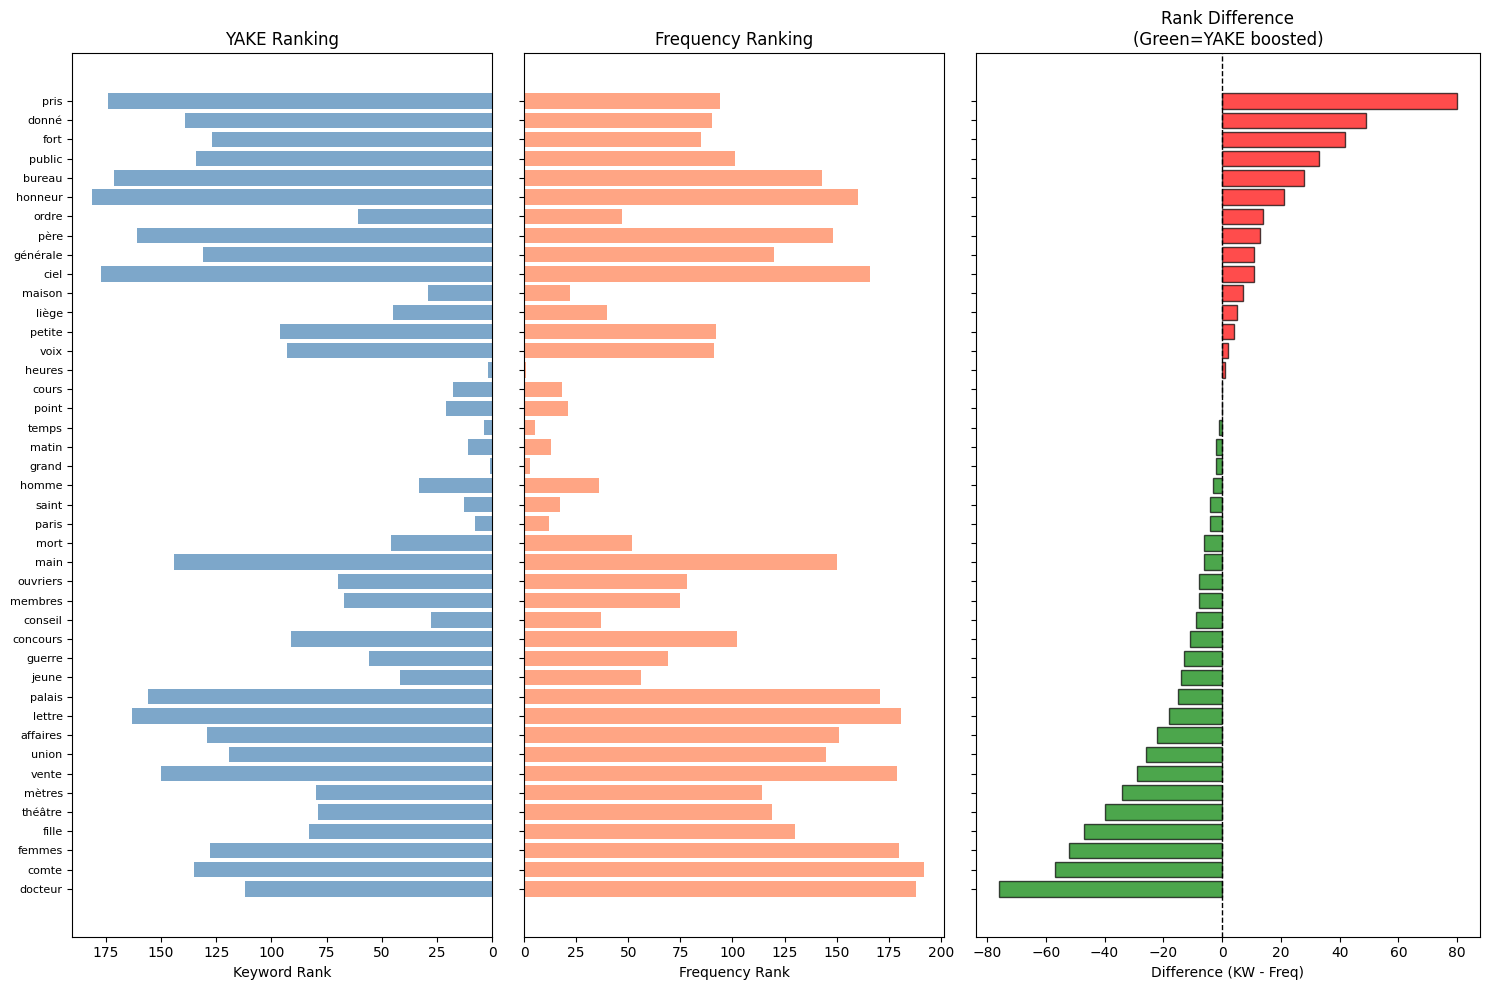

In [42]:
# Sort by difference for better visualization
rank_data.sort(key=lambda x: x[3])

# Select subset for cleaner visualization
subset = rank_data[::len(rank_data)//40]  # Sample ~40 words evenly across the range

words_subset = [item[0] for item in subset]
kw_ranks_subset = [item[1] for item in subset]
freq_ranks_subset = [item[2] for item in subset]
diffs_subset = [item[3] for item in subset]

# Create comparison heatmap
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10), gridspec_kw={'width_ratios': [1, 1, 1.2]})

# KW Ranks
ax1.barh(range(len(words_subset)), kw_ranks_subset, color='steelblue', alpha=0.7)
ax1.set_yticks(range(len(words_subset)))
ax1.set_yticklabels(words_subset, fontsize=8)
ax1.set_xlabel('Keyword Rank')
ax1.set_title('YAKE Ranking')
ax1.invert_xaxis()

# Freq Ranks
ax2.barh(range(len(words_subset)), freq_ranks_subset, color='coral', alpha=0.7)
ax2.set_yticks(range(len(words_subset)))
ax2.set_yticklabels([])
ax2.set_xlabel('Frequency Rank')
ax2.set_title('Frequency Ranking')

# Difference (diverging colors)
colors_div = ['green' if d < 0 else 'red' for d in diffs_subset]
ax3.barh(range(len(words_subset)), diffs_subset, color=colors_div, alpha=0.7, edgecolor='black')
ax3.set_yticks(range(len(words_subset)))
ax3.set_yticklabels([])
ax3.set_xlabel('Difference (KW - Freq)')
ax3.set_title('Rank Difference\n(Green=YAKE boosted)')
ax3.axvline(x=0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

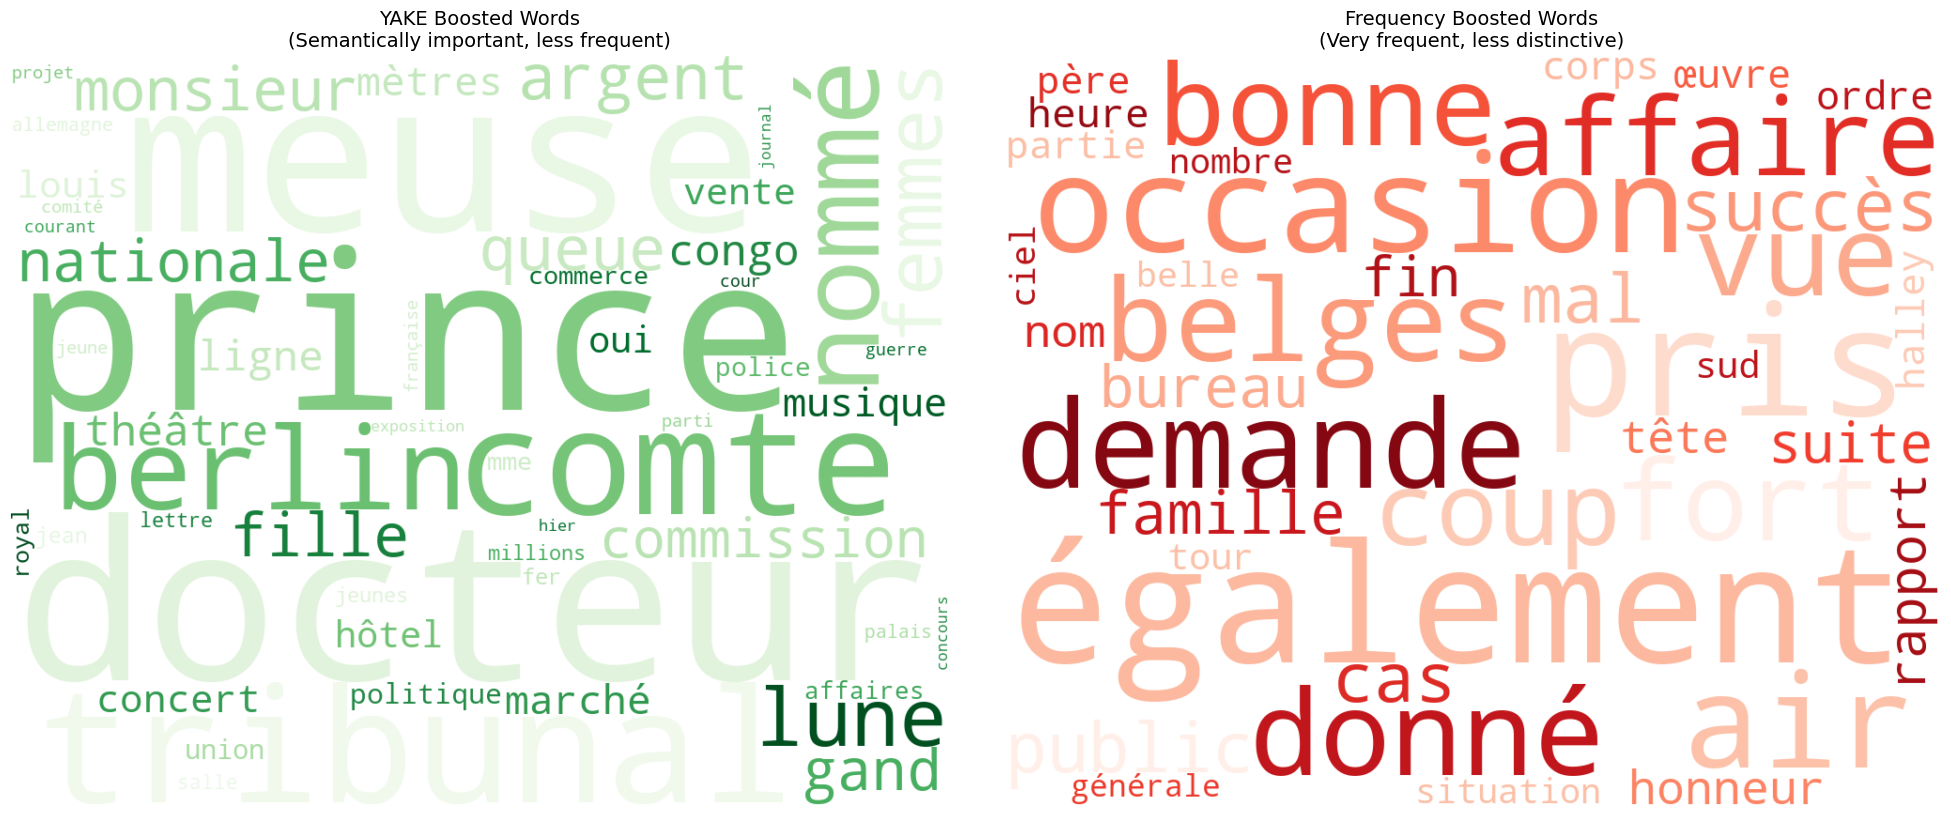

In [ ]:
from wordcloud import WordCloud

# Create two word clouds: one for YAKE-boosted, one for frequency-boosted
yake_boosted = {word: abs(diff) for word, _, _, diff in rank_data if diff < -10}
freq_boosted = {word: abs(diff) for word, _, _, diff in rank_data if diff > 10}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# YAKE-boosted words (green theme)
if yake_boosted:
    wc1 = WordCloud(width=1000, height=800, background_color='white', 
                    colormap='Greens').generate_from_frequencies(yake_boosted)
    ax1.imshow(wc1, interpolation='bilinear')
    ax1.set_title('YAKE Boosted Words\n(Semantically important, less frequent)', fontsize=14)
    ax1.axis('off')

# Frequency-boosted words (red theme)
if freq_boosted:
    wc2 = WordCloud(width=1000, height=800, background_color='white',
                    colormap='Reds').generate_from_frequencies(freq_boosted)
    ax2.imshow(wc2, interpolation='bilinear')
    ax2.set_title('Frequency Boosted Words\n(Very frequent, less distinctive)', fontsize=14)
    ax2.axis('off')

plt.tight_layout()
plt.show()

#je trouve que ceci montre l'importance d'analyser les noms propres 